# 1. 数据表示
前面例子使用的数据存储在多维 Numpy 数组中，也叫张量(tensor)。一般来说，当前所有机器学习系统都使用张量作为基本数据结构。张量对这个领域非常重要，重要到 Google 的 TensorFlow 都以它来命名。那么什么是张量?
张量这一概念的核心在于，它是一个数据容器。它包含的数据几乎总是数值数据，因此它 是数字的容器。你可能对矩阵很熟悉，它是二维张量。张量是矩阵向任意维度的推广[注意， 张量的维度(dimension)通常叫作轴(axis)]。
## 标量（0D张量）
仅包含一个数字的张量叫作标量(scalar，也叫标量张量、零维张量、0D 张量)。在 Numpy 中，一个 float32 或 float64 的数字就是一个标量张量(或标量数组)。你可以用 ndim 属性来查看一个 Numpy 张量的轴的个数。标量张量有 0 个轴(ndim == 0)。张量轴的个数也叫作 阶(rank)。下面是一个 Numpy 标量。
```
>>> import numpy as np 
>>> x = np.array(12) 
>>> x
array(12)
>>> x.ndim 0
```
## 向量（1D张量）
数字组成的数组叫作向量(vector)或一维张量(1D 张量)。一维张量只有一个轴。下面是 一个 Numpy 向量。
```
>>> x = np.array([12, 3, 6, 14, 7])
>>> x
array([12, 3, 6, 14, 7])
>>> x.ndim
1
```
这个向量有 5 个元素，所以被称为 5D 向量。不要把 5D 向量和 5D 张量弄混! 5D 向量只 有一个轴，沿着轴有 5 个维度，而 5D 张量有 5 个轴(沿着每个轴可能有任意个维度)。维度 (dimensionality)可以表示沿着某个轴上的元素个数(比如 5D 向量)，也可以表示张量中轴的个 数(比如 5D 张量)，这有时会令人感到混乱。对于后一种情况，技术上更准确的说法是 5 阶张量(张量的阶数即轴的个数)，但 5D 张量这种模糊的写法更常见。
## 矩阵(2D 张量)
向量组成的数组叫作矩阵(matrix)或二维张量(2D 张量)。矩阵有 2 个轴(通常叫作行和 列)。你可以将矩阵直观地理解为数字组成的矩形网格。下面是一个 Numpy 矩阵。
```
>>> x = np.array([[5, 78, 2, 34, 0],
                  [6, 79, 3, 35, 1],
                  [7, 80, 4, 36, 2]])
>>> x.ndim 2
```
第一个轴上的元素叫作行(row)，第二个轴上的元素叫作列(column)。在上面的例子中， [5, 78, 2, 34, 0] 是 x 的第一行，[5, 6, 7] 是第一列。
## 3D 张量与更高维张量
将多个矩阵组合成一个新的数组，可以得到一个 3D 张量，你可以将其直观地理解为数字组成的立方体。下面是一个 Numpy 的 3D 张量。
```
>>> x = np.array(
[[[5, 78, 2, 34, 0], 
[6, 79, 3, 35, 1],
[7, 80, 4, 36, 2]], 
[[5, 78, 2, 34, 0], 
[6, 79, 3, 35, 1],
[7, 80, 4, 36, 2]], 
[[5, 78, 2, 34, 0], 
[6, 79, 3, 35, 1],
[7, 80, 4, 36, 2]]])
>>> x.ndim 
 3
```
将多个 3D 张量组合成一个数组，可以创建一个 4D 张量，以此类推。深度学习处理的一般 是 0D 到 4D 的张量，但处理视频数据时可能会遇到 5D 张量。
## 关键属性
张量是由以下三个关键属性来定义的。
- 轴的个数(阶)。例如，3D 张量有 3 个轴，矩阵有 2 个轴。这在 Numpy 等 Python 库中
也叫张量的 ndim。
- 形状。这是一个整数元组，表示张量沿每个轴的维度大小(元素个数)。例如，前面矩
阵示例的形状为 (3, 5)，3D 张量示例的形状为 (3, 3, 5)。向量的形状只包含一个
元素，比如 (5,)，而标量的形状为空，即 ()。
- 数据类型(在 Python 库中通常叫作 dtype)。这是张量中所包含数据的类型，例如，张
量的类型可以是 float32、uint8、float64 等。在极少数情况下，你可能会遇到字符 (char)张量。注意，Numpy(以及大多数其他库)中不存在字符串张量，因为张量存储在预先分配的连续内存段中，而字符串的长度是可变的，无法用这种方式存储。

为了具体说明，我们回头看一下 MNIST 例子中处理的数据。首先加载 MNIST 数据集。 
```
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
接下来，我们给出张量 train_images 的轴的个数，即 ndim 属性。
>>> print(train_images.ndim)
3
```
下面是它的形状。
```
>>> print(train_images.shape) 
(60000, 28, 28)
```
下面是它的数据类型，即 dtype 属性。
```
>>> print(train_images.dtype)
uint8
```
所以，这里 train_images 是一个由 8 位整数组成的 3D 张量。更确切地说，它是 60 000
个矩阵组成的数组，每个矩阵由 28×28 个整数组成。每个这样的矩阵都是一张灰度图像，元素 取值范围为 0~255。
我们用 Matplotlib 库(Python 标准科学套件的一部分)来显示这个 3D 张量中的第 4 个数字

(60000, 28, 28)
3
uint8


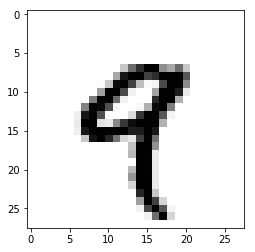

In [3]:
from keras.datasets import mnist
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()
print(train_images.shape)
print(train_images.ndim)
print(train_images.dtype)
digit=train_images[4]
import matplotlib.pyplot as plt
plt.imshow(digit,cmap=plt.cm.binary)
plt.show()


# 2.Nmupy张量操作
在前面的例子中，我们使用语法 train_images[i] 来选择沿着第一个轴的特定数字。选 择张量的特定元素叫作张量切片(tensor slicing)。我们来看一下 Numpy 数组上的张量切片运算。
下面这个例子选择第 10~100 个数字(不包括第 100 个)，并将其放在形状为 (90, 28, 28) 的数组中。
```
>>> my_slice = train_images[10:100] 
>>> print(my_slice.shape)
(90, 28, 28)
```
它等同于下面这个更复杂的写法，给出了切片沿着每个张量轴的起始索引和结束索引。 注意，: 等同于选择整个轴。
```
>>> my_slice = train_images[10:100, :, :]
>>> my_slice.shape
(90, 28, 28)
>>> my_slice = train_images[10:100, 0:28, 0:28] 
>>> my_slice.shape
(90, 28, 28)
```
一般来说，你可以沿着每个张量轴在任意两个索引之间进行选择。例如，你可以在所有图 像的右下角选出 14 像素×14 像素的区域:
```
my_slice=train_images[:,14:,14:]
```
也可以使用负数索引。与 Python 列表中的负数索引类似，它表示与当前轴终点的相对位置。 你可以在图像中心裁剪出 14 像素×14 像素的区域:
```
my_slice=train_images[:,7:-7,7:-7]
```


In [5]:
my_slice = train_images[10:100]
print(my_slice.shape)


(90, 28, 28)


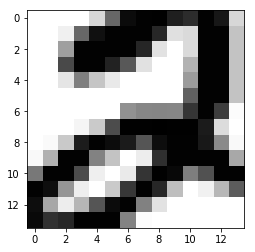

In [8]:
my_slice=train_images[:,7:-7,7:-7]
plt.imshow(my_slice[5],cmap=plt.cm.binary)
plt.show()

# 数据批量的概念
通常来说，深度学习中所有数据张量的第一个轴(0 轴，因为索引从 0 开始)都是样本轴(samples axis，有时也叫样本维度)。在 MNIST 的例子中，样本就是数字图像。
此外，深度学习模型不会同时处理整个数据集，而是将数据拆分成小批量。具体来看，下 面是 MNIST 数据集的一个批量，批量大小为 128。
```
batch = train_images[:128]
```
然后是下一个批量
```
batch= train_images[128:256]
```
然后是第 n 个批量
```
batch = train_images[128 * n:128 * (n + 1)]
```
对于这种批量张量，第一个轴(0 轴)叫作批量轴(batch axis)或批量维度(batch dimension)。 在使用 Keras 和其他深度学习库时，你会经常遇到这个术语。

# 3.现实世界中的数据张量
我们用几个你未来会遇到的示例来具体介绍数据张量。你需要处理的数据几乎总是以下类 别之一。
- 向量数据:2D 张量，形状为 (samples, features)。
- 时间序列数据或序列数据:3D 张量，形状为 (samples, timesteps, features)。  
- 图像:4D 张量，形状为 (samples, height, width, channels) 或 (samples, channels,height, width)。
- 视频:5D 张量，形状为 (samples, frames, height, width, channels) 或 (samples,frames, channels, height, width)。
## 向量数据
这是最常见的数据。对于这种数据集，每个数据点都被编码为一个向量，因此一个数据批 量就被编码为 2D 张量(即向量组成的数组)，其中第一个轴是样本轴，第二个轴是特征轴。
我们来看两个例子。
- 人口统计数据集，其中包括每个人的年龄、邮编和收入。每个人可以表示为包含 3 个值的向量，而整个数据集包含 100 000 个人，因此可以存储在形状为 (100000, 3) 的 2D张量中。
- 文本文档数据集，我们将每个文档表示为每个单词在其中出现的次数(字典中包含20 000 个常见单词)。每个文档可以被编码为包含 20 000 个值的向量(每个值对应于 字典中每个单词的出现次数)，整个数据集包含 500 个文档，因此可以存储在形状为 (500, 20000) 的张量中。
## 时间序列数据或序列数据
当时间(或序列顺序)对于数据很重要时，应该将数据存储在带有时间轴的 3D 张量中。 每个样本可以被编码为一个向量序列(即 2D 张量)，因此一个数据批量就被编码为一个 3D 张量
根据惯例，时间轴始终是第 2 个轴(索引为 1 的轴)。我们来看几个例子。
- 股票价格数据集。每一分钟，我们将股票的当前价格、前一分钟的最高价格和前一分钟 的最低价格保存下来。因此每分钟被编码为一个 3D 向量，整个交易日被编码为一个形 状为 (390, 3) 的 2D 张量(一个交易日有 390 分钟)，而 250 天的数据则可以保存在一个形状为 (250, 390, 3) 的 3D 张量中。这里每个样本是一天的股票数据。
- 推文数据集。我们将每条推文编码为 280 个字符组成的序列，而每个字符又来自于 128 个字符组成的字母表。在这种情况下，每个字符可以被编码为大小为 128 的二进制向量 (只有在该字符对应的索引位置取值为 1，其他元素都为 0)。那么每条推文可以被编码 为一个形状为 (280, 128) 的 2D 张量，而包含 100 万条推文的数据集则可以存储在一个形状为 (1000000, 280, 128) 的张量中。
## 图像数据
图像通常具有三个维度:高度、宽度和颜色深度。虽然灰度图像(比如 MNIST 数字图像) 只有一个颜色通道，因此可以保存在 2D 张量中，但按照惯例，图像张量始终都是 3D 张量，灰 度图像的彩色通道只有一维。因此，如果图像大小为 256×256，那么 128 张灰度图像组成的批 量可以保存在一个形状为 (128, 256, 256, 1) 的张量中，而 128 张彩色图像组成的批量则可以保存在一个形状为 (128, 256, 256, 3) 的张量中

图像张量的形状有两种约定:`通道在后(channels-last)`的约定(在 TensorFlow 中使用)和 `通道在前(channels-first)`的约定(在 Theano 中使用)。Google 的 TensorFlow 机器学习框架将 颜色深度轴放在最后:(samples, height, width, color_depth)。与此相反，Theano 将图像深度轴放在批量轴之后:(samples, color_depth, height, width)。如果采用 Theano 约定，前面的两个例子将变成 (128, 1, 256, 256) 和 (128, 3, 256, 256)。 Keras 框架同时支持这两种格式。
## 视频数据
视频数据是现实生活中需要用到 5D 张量的少数数据类型之一。视频可以看作一系列帧， 6 每一帧都是一张彩色图像。由于每一帧都可以保存在一个形状为(height, width, color_ depth) 的 3D 张量中，因此一系列帧可以保存在一个形状为 (frames, height, width, color_depth) 的 4D 张量中，而不同视频组成的批量则可以保存在一个 5D 张量中，其形状为 (samples, frames, height, width, color_depth)。

举个例子，一个以每秒 4 帧采样的 60 秒 YouTube 视频片段，视频尺寸为 144×256，这个 视频共有 240 帧。4 个这样的视频片段组成的批量将保存在形状为 (4, 240, 144, 256, 3) 的张量中。总共有 106 168 320 个值!如果张量的数据类型(dtype)是 float32，每个值都是 32 位，那么这个张量共有 405MB。好大!你在现实生活中遇到的视频要小得多，因为它们不以 float32 格式存储，而且通常被大大压缩，比如 MPEG 格式。
# 4.张量运算
所有计算机程序最终都可以简化为二进制输入上的一些二进制运算(AND、OR、NOR 等)，与此类似，深度神经网络学到的所有变换也都可以简化为数值数据张量上的一些张量运算(tensoroperation)，例如加上张量、乘以张量等。
在最开始的例子中，我们通过叠加 Dense 层来构建网络。Keras 层的实例如下所示。
```
keras.layers.Dense(512, activation='relu')
```
这个层可以理解为一个函数，输入一个 2D 张量，返回另一个 2D 张量，即输入张量的新 表示。具体而言，这个函数如下所示(其中 W 是一个 2D 张量，b 是一个向量，二者都是该层的 属性)。
${f(x)=relu(W*X+b)}$
```
output = relu(dot(W, input) + b)
```
我们将上式拆开来看。这里有三个张量运算:输入张量和张量 W 之间的点积运算(dot)、
得到的 2D 张量与向量 b 之间的加法运算(+)、最后的 relu 运算。relu(x) 是 max(x, 0)。
这里实际上就是实现了一层的神经元，是神经网络的一层，将一个2D张量输入神经元，经过神经元的激活函数运算后将结果输出给下一层
图神经元
如果以mnist数据为例，其中向量X（x1,x2,···,xn)就是张图片的28*28个纬度的元素，共有60000张，组成了形状为（60000，28*28）的张量，张量W就是这每接收一张图片这一层层神经元的权重，向量b就是这一层神经元的阈值，每个神经元的输入数据乘以权重后与阈值做差的结果，再经过激活函数（选择合适的激活函数也是个很大的问题）的映射，就是这一个神经元的输出y，经过很多神经元组成的网络结构后，输出一个最终预测结果y～，我们通过一些数学方法衡量预测结果y～与真实结果y的差距（损失函数），根据这个差距调整所有神经元里面的权重（优化算法），这个过程称为训练，经过大量数据训练后，网络中的权重能够保证输出质量较高的预测结果y～，损失函数的值也因此降低。这个过程其实是一个简单的反馈过程。
## 逐元素运算
我们使用relu函数作为神经元的激活函数，也被称为线性修正单元
relu 运算和加法都是逐元素(element-wise)的运算，即该运算独立地应用于张量中的每 个元素，也就是说，这些运算非常适合大规模并行实现(向量化实现，这一术语来自于 1970— 1990 年间向量处理器超级计算机架构)。我们可以借助线性代数完成运算。
如果你想对逐元素运算编写简单的 Python 实现，那么 可以用 for 循环。下列代码是对逐元素 relu 运算的简单实现。
```
def naive_relu(x):
    assert len(x.shape)==2 ##输入的x是一个2D张量（sample，feature）
    x=x.copy()#避免张量被覆盖
    for i in (x.shape[0]):# 对每一个样本
        for j in (x.shape[1]):#的每一个元素
            x[i,j]=max(x[i,j],0)
    return x
```
对于加法采用同样的实现方法。
```
def naive_add(x,y):
    assert len(x.shape)==2
    assert len(y.shape)==2
    x=x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i,j]+=y[i,j]
    return x
```
根据同样的方法，你可以实现逐元素的乘法、减法等。
在实践中处理 Numpy 数组时，我们不必自己编写这些基本线性代数运算，这些运算都是优化好的 Numpy 内置函数，这些函数将大量运算交给安装好的基础线性代数子程序(BLAS，basic linear algebra subprograms)实现(没装 的话，应该装一个)。BLAS 是低层次的、高度并行的、高效的张量操作程序，通常用 Fortran 或 C 语言来实现。
因此，在 Numpy 中可以直接进行下列逐元素运算，速度非常快。
```
import numpy as np
 z=x+y #逐元素的相加 
 z = np.maximum(z, 0.)#relu(z)
```
## 广播
上一节 naive_add 的简单实现仅支持两个形状相同的 2D 张量相加。但在前面介绍的 Dense 层中，我们将一个 2D 张量与一个向量相加。如果将两个形状不同的张量相加，会发生 什么?
如果没有歧义的话，较小的张量会被广播(broadcast)，以匹配较大张量的形状。广播包含 4 以下两步。
- (1) 向较小的张量添加轴(叫作广播轴)，使其ndim与较大的张量相同。
- (2) 将较小的张量沿着新轴重复，使其形状与较大的张量相同。
来看一个具体的例子。假设 X 的形状是 (32, 10)，y 的形状是 (10,)。首先，我们给 y
添加空的第一个轴，这样 y 的形状变为 (1, 10)。然后，我们将 y 沿着新轴重复 32 次，这样 得到的张量 Y 的形状为 (32, 10)，并且 Y[i, :] == y for i in range(0, 32)。现在， 我们可以将 X 和 Y 相加，因为它们的形状相同。
在实际的实现过程中并不会创建新的 2D 张量，因为那样做非常低效。重复的操作完全是 虚拟的，它只出现在算法中，而没有发生在内存中。但想象将向量沿着新轴重复 10 次，是一种 很有用的思维模型。下面是一种简单的实现。
```
def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2 #x 是一个 Numpy 的 2D 张量
    assert len(y.shape) == 1 #y 是一个 Numpy 向量
    assert x.shape[1] == y.shape[0]
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]): x[i, j] += y[j]
    return x
```
如果一个张量的形状是 (a, b, ... n, n+1, ... m)，另一个张量的形状是 (n, n+1, ... m)，那么你通常可以利用广播对它们做两个张量之间的逐元素运算。广播操作会自动应用 于从a到n-1的轴。
下面这个例子利用广播将逐元素的 maximum 运算应用于两个形状不同的张量。
```
import numpy as np
x=np.random.random((64,3,32,10)) #x 是形状为 (64, 3, 32, 10) 的随机张量
y=np.random.random((32,10)) #y是形状为(32,10)的随机张量
z=np.maximum(x,y) #输出的形状与x相同(64, 3, 32, 10) 
```
## 张量点积运算（矩阵点乘）
点积运算，也叫张量积(tensor product，不要与逐元素的乘积弄混)，是最常见也最有用的 张量运算。与逐元素的运算不同，它将输入张量的元素合并在一起。在 Numpy、Keras、Theano 和 TensorFlow 中，都是用 * 实现逐元素乘积。TensorFlow 中的 点积使用了不同的语法，但在 Numpy 和 Keras 中，都是用标准的 dot 运算符来实现点积。
```
import numpy as np
z=np.dot(x,y)
```
数学符号中的点(.)表示点积运算。 z=x.y
从数学的角度来看，点积运算做了什么?我们首先看一下两个向量 x 和 y 的点积。其计算 过程如下。
```
def naive_vector_dot(x, y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i] 
    return z
```

注意，两个向量之间的点积是一个标量，而且只有元素个数相同的向量之间才能做点积。
你还可以对一个矩阵 x 和一个向量 y 做点积，返回值是一个向量，其中每个元素是 y 和 x 的每一行之间的点积。其实现过程如下。
```
import numpy as np
def naive_matrix_vector_dot(x, y): 
    assert len(x.shape) == 2 #x是一个Numpy矩阵
    assert len(y.shape) == 1 #y是一个Numpy向量
    assert x.shape[1] == y.shape[0] #x的第1维必须和y的第0维一样
    z=np.zeros(x.shape[0])
    for i in range(x.shape[0]):#每一行的
        for j in range(x.shape[1]):#每一列   
            z[i]=x[i,j]*y[j]
            return z #返回类型与x.shape[0]相同
```
你还可以复用前面写过的代码，从中可以看出矩阵 - 向量点积与向量点积之间的关系。
```
def naive_matrix_vector_dot(x, y): 
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i, :], y) 
    return z
```
注意，如果两个张量中有一个的 ndim 大于 1，那么 dot 运算就不再是对称的，也就是说，注意，如果两个张量中有一个的 ndim 大于 1，那么 dot 运算就不再是对称的，也就是说，dot(x, y) 不等于 dot(y, x)。
这很好理解，矩阵相乘不满足交换律也是这个道理。

当然，点积可以推广到具有任意个轴的张量。最常见的应用可能就是两个矩阵之间的点积。 对于两个矩阵 x 和 y，当且仅当 x.shape[1] == y.shape[0] 时，你才可以对它们做点积(dot(x, y))。得到的结果是一个形状为 (x.shape[0], y.shape[1]) 的矩阵，其元素为 x 的行与 y 的列之间的点积。其简单实现如下。
```
def naive_matrix_dot(x,y):
    assert len(x.shape[0])==2
    assert len(y.shape[1])==2
    assert x.shape[1]=y.shape[0] #x的列数等于y的行数
    z=np.zeros((x.shape[0],y.shape[1])) #提前构造好全零矩阵
    for i in range(x.shape[0]):
        for j in range(y.shape[1):
            row_x=x[i,:]
            col_y=y[:,j]
            z[i,j]=naive_vector_dot(row_x,col_y)
    return z
```
也就是一个标准的矩阵点乘过程。如果是更高维的张量做点积，其形状匹配遵循上述原则：
```
    （a,b,c,d).(d,)=（a,b,c)
     (a,b,c,d).(d,e)=(a,b,c,e)
```
## 张量变形
第三个重要的张量运算是张量变形(tensor reshaping)。虽然前面神经网络第一个例子的 Dense 层中没有用到它，但在将图像数据输入神经网络之前，我们在预处理时用到了这个运算。
```
train_images = train_images.reshape((60000, 28 * 28))
```
我们把（60000,28,28)的ndim=3张量变形为（60000,28*28)的ndim=2的张量
张量变形是指改变张量的行和列，以得到想要的形状。变形后的张量的元素总个数与初始 张量相同。简单的例子可以帮助我们理解张量变形。
```
>>> x = np.array([[0., 1.], [2., 3.],
[4., 5.]]) >>> print(x.shape)
(3, 2)
>>> x = x.reshape((6, 1)) >>> x
array([[ 0.],
           [ 1.],
           [ 2.],
           [ 3.],
           [ 4.],
           [ 5.]])
>>> x = x.reshape((2, 3)) >>> x
array([[ 0., 1., 2.],
[ 3., 4., 5.]])
```
经常遇到的一种特殊的张量变形是转置(transposition)。对矩阵做转置是指将行和列互换， 使 x[i, :] 变为 x[:, i]。
 ```
>>> x = np.zeros((300, 20)) 
>>> x = np.transpose(x) 
>>> print(x.shape)
(20, 300)
```
## 张量运算的几何解释
对于张量运算所操作的张量，其元素可以被解释为某种几何空间内点的坐标，因此所有的张量运算都有几何解释。
通常来说，仿射变换、旋转、缩放等基本的几何操作都可以表示为张量运算。举个例子，要将 一个二维向量旋转 theta 角，可以通过与一个 2×2 矩阵做点积来实现，这个矩阵为 R = [u, v]，其 中 u 和 v 都是平面向量:u = [cos(theta), sin(theta)]，v = [-sin(theta), cos(theta)]。
## 深度学习的几何解释
前面讲过，神经网络完全由一系列张量运算组成，而这些张量运算都只是输入数据的几何 变换。因此，你可以将神经网络解释为高维空间中非常复杂的几何变换，这种变换可以通过许 多简单的步骤来实现。

对于三维的情况，下面这个思维图像是很有用的。想象有两张彩纸:一张红色，一张蓝色。
将其中一张纸放在另一张上。现在将两张纸一起揉成小球。这个皱巴巴的纸球就是你的输入数 据，每张纸对应于分类问题中的一个类别。神经网络(或者任何机器学习模型)要做的就是找 到可以让纸球恢复平整的变换，从而能够再次让两个类别明确可分。通过深度学习，这一过程 可以用三维空间中一系列简单的变换来实现，比如你用手指对纸球做的变换，每次做一个动作。

让纸球恢复平整就是机器学习的内容:为复杂的、高度折叠的数据流形找到简洁的表示。 现在你应该能够很好地理解，为什么深度学习特别擅长这一点:它将复杂的几何变换逐步分解 为一长串基本的几何变换，这与人类展开纸球所采取的策略大致相同。深度网络的每一层都通 过变换使数据解开一点点——许多层堆叠在一起，可以实现非常复杂的解开过程。